<a href="https://colab.research.google.com/github/Vinith-Krish/Cataract_Eye_Classification_Using_CNN/blob/main/Cataract_CNN_MINI_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Model Architecture**

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
!pip install tensorflow


**Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set= train_datagen.flow_from_directory('/content/drive/MyDrive/archive (1)/processed_images/train',target_size=(224,224),batch_size=8,class_mode='binary')
test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/archive (1)/processed_images/test',target_size=(224,224),batch_size=8,class_mode='binary')

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


**Adadelta**

In [ ]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_set,steps_per_epoch=20,epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5303 - loss: 0.6927
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5092 - loss: 0.6929
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4852 - loss: 0.6934
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2562 - loss: 0.6969  
Epoch 5/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4502 - loss: 0.6939
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5088 - loss: 0.6927
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.5275 - loss: 0.6929
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5594 - loss: 0.6918  
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5062 - loss: 0.6929
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5519 - loss: 0.6920
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 980ms/step - accuracy: 0.4595 - loss: 0.6936
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5656 - loss: 0.6921  
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 995ms/step - accuracy: 0.5356 - loss: 0.6925
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5480 - loss: 0.6921
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 873ms/step - accuracy: 0.4698 - loss: 0.6934
Epoch 16/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy:

In [ ]:
test_loss,test_acc =model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

16/16 - 32s - 2s/step - accuracy: 0.5041 - loss: 0.6928



Test Loss: 	 0.6927840709686279 :

Test Accuracy: 	 0.5041322112083435 :



**Stochastic Gradient Descent**

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_set,steps_per_epoch=20,epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4983 - loss: 0.6926
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5101 - loss: 0.6924
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 942ms/step - accuracy: 0.5645 - loss: 0.6904
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5656 - loss: 0.6879  
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4423 - loss: 0.6966
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 995ms/step - accuracy: 0.5616 - loss: 0.6887
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 875ms/step - accuracy: 0.4794 - loss: 0.6922
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4938 - loss: 0.6951  
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5580 - loss: 0.6855
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4949 - loss: 0.6890
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.5944 - loss: 0.6790
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - ac

In [ ]:
test_loss,test_acc =model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

16/16 - 7s - 438ms/step - accuracy: 0.7934 - loss: 0.6696



Test Loss: 	 0.6695725917816162 :

Test Accuracy: 	 0.7933884263038635 :



**Adam**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_set,steps_per_epoch=20,epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5356 - loss: 0.6937
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5380 - loss: 0.6927
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 989ms/step - accuracy: 0.5279 - loss: 0.7645
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2438 - loss: 0.6936  
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5567 - loss: 0.6916
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4477 - loss: 0.6839
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 907ms/step - accuracy: 0.4713 - loss: 0.6815
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6313 - loss: 0.7428  
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6215 - loss: 0.6360
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5300 - loss: 0.9578
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 984ms/step - accuracy: 0.5016 - loss: 0.6935
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accur

In [ ]:
test_loss,test_acc =model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

16/16 - 8s - 474ms/step - accuracy: 0.4959 - loss: 0.6932



Test Loss: 	 0.6931634545326233 :

Test Accuracy: 	 0.4958677589893341 :



**DROPOUTS**

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_set,steps_per_epoch=20,epochs=20)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5834 - loss: 0.6923
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4559 - loss: 0.6950
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 989ms/step - accuracy: 0.5222 - loss: 0.6930
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4406 - loss: 0.6926  
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4748 - loss: 0.6934
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4824 - loss: 0.6930
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 985ms/step - accuracy: 0.5366 - loss: 0.6928
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4344 - loss: 0.6942  
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5792 - loss: 0.6912
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5183 - loss: 0.6927
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 898ms/step - accuracy: 0.4489 - loss: 0.6940
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accur

In [ ]:
test_loss,test_acc =model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

16/16 - 9s - 568ms/step - accuracy: 0.5372 - loss: 0.6911



Test Loss: 	 0.6911064386367798 :

Test Accuracy: 	 0.5371900796890259 :



**TRANSFER LEARNING**

**Vgg16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(1, activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_model.fit(training_set,steps_per_epoch=20,epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.8884 - loss: 0.2506
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9549 - loss: 0.1365
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9291 - loss: 0.1706
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.8813 - loss: 0.5447
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.9201 - loss: 0.2331
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9685 - loss: 0.0954
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.9756 - loss: 0.0582
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 1.0000 - loss: 0.0075
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.9417 - loss: 0.2445
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.9526 - loss: 0.1216
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.9974 - loss: 0.0253
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - accura

In [ ]:
test_loss,test_acc =vgg_model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

16/16 - 85s - 5s/step - accuracy: 0.9587 - loss: 0.0912



Test Loss: 	 0.09120504558086395 :

Test Accuracy: 	 0.9586777091026306 :



**Resnet**

In [ ]:
import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_model.fit(training_set,steps_per_epoch=20,epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5467 - loss: 0.8667
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5618 - loss: 0.7659
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4921 - loss: 0.7035
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4344 - loss: 0.7181
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5981 - loss: 0.6819
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5239 - loss: 0.7059
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4668 - loss: 0.7906
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5594 - loss: 0.6514
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5251 - loss: 0.6731
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6470 - loss: 0.5954
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6570 - loss: 0.6379
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7242 -

**Vgg19**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_model=Sequential()
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))
vgg.trainable = False
vgg19_model.add(vgg)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg19_model.fit(training_set,steps_per_epoch=20,epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.4743 - loss: 5.4496
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.8669 - loss: 0.3676
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 122s 6s/step - accuracy: 0.7952 - loss: 0.4383
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.9406 - loss: 0.2122
Epoch 5/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.8868 - loss: 0.3020
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 122s 6s/step - accuracy: 0.9519 - loss: 0.1070
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.8938 - loss: 0.2072
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.7563 - loss: 0.8955
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 172s 6s/step - accuracy: 0.9293 - loss: 0.2390
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.9181 - loss: 0.2390
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.9141 - loss: 0.2166
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 324ms/step - accuracy: 0.8094 - loss: 0.2736
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.9280 - loss: 0.2084
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.9185 - loss: 0.1866
Epoch 15/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.9157 - loss: 0.1694


In [ ]:
test_loss,test_acc =vgg19_model.evaluate(test_set,verbose=2)
print("\n\n")
print("Test Loss: \t",test_loss,":\n")
print("Test Accuracy: \t",test_acc,":\n")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 - 91s - 6s/step - accuracy: 0.9256 - loss: 0.1507



Test Loss: 	 0.15073373913764954 :

Test Accuracy: 	 0.9256198406219482 :



Explaianable AI


*   LIME




In [ ]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e57a2ab159c5772e60a1bc2de2decd458cb95c0c0894c78260658d154ddc7a5b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
tmp1,tmp2=next(test_set)

In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.4 MB/s eta 0:00:00


In [ ]:

background =shap.utils.sample(tmp1,5)
explainer =shap.DeepExplainer(vgg19_model,background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_index =np.random.randint(0,background.shape[0])
sample_image =background[sample_index]

In [ ]:
!pip install lime shap
import shap
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), vgg_model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 

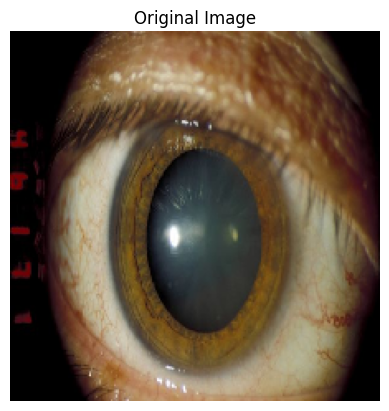

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

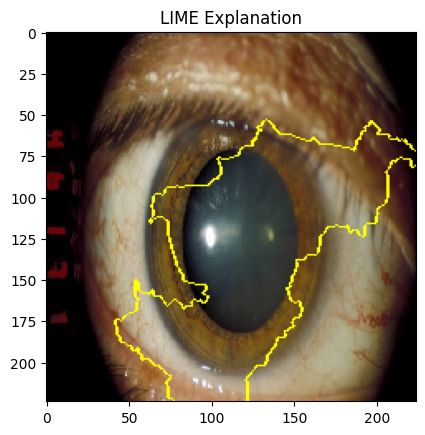

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(background[sample_index],mask))
plt.title("LIME Explanation")
plt.show()

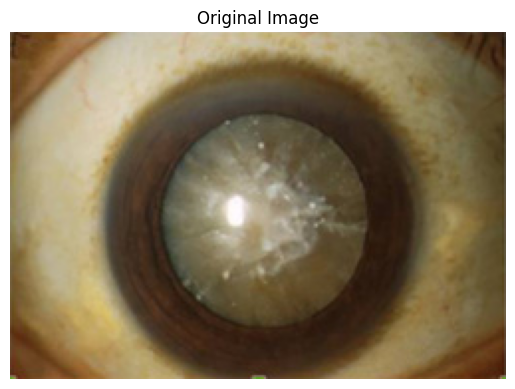

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/drive/MyDrive/archive (1)/processed_images/test/cataract/image_258.png")
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

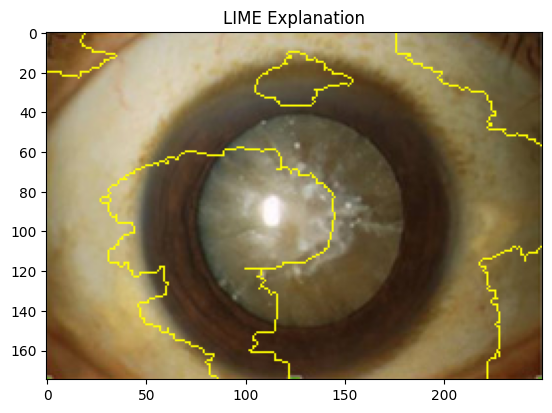

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
from skimage.transform import resize
resized_mask = resize(mask, (img.shape[0], img.shape[1]), order=0, preserve_range=True)

plt.imshow(mark_boundaries(img, resized_mask.astype(bool)))
plt.title("LIME Explanation")
plt.show()

Prediction of a Normal Eye image

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/archive (1)/processed_images/test/cataract/image_293.png',target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = vgg_model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] > 0.5:
  result[0][0] = 1
else:
  result[0][0] = 0

if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Cataract'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.]]
Cataract


Prediction of a Cataract Eye Image

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/archive (1)/processed_images/test/normal/image_247.png',target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = vgg_model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] > 0.5:
  result[0][0] = 1
else:
  result[0][0] = 0

if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Cataract'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
[[1.]]
Normal
